In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
import pandas as pd


In [2]:
def degree(g, nodes=None, as_list=True):
    deg = None
    if nodes:
        deg = dict(g.degree(nodes))
    else:
        deg = dict(g.degree())
    
    if as_list:
        return list(deg.values())
    return deg

def degree_plot(g, nodes, title=''):
    deg = degree(g, nodes)
    bins = 100
    if len(nodes) < 100:
        bins = len(nodes)
    hist = np.histogram(deg, bins=bins)
    v = range(min(deg), max(deg)+1)
    freqs, edges = hist[0], hist[1]
    n = freqs.size
    means = [(edges[i] + edges[i+1]) / 2 for i in range(n)]
    
    # SCATTER PLOT
    plt.plot(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")
    plt.title("Degree distribution for %s" % title)
    plt.show()
    
    # LOG LOG PLOT
    plt.loglog(means, freqs, ".")
    plt.xlabel("log(k)")
    plt.ylabel("log(frequency)")
    plt.title("Log-log degree distribution for %s" % title)
    plt.show()

In [3]:
USER = 'user'
BIZ = 'biz'

In [4]:
biz = pd.read_csv('toronto/restaurants_toronto.csv')
user = pd.read_csv('toronto/toronto_users.csv')
reviews = pd.read_csv('toronto/reviews_all_time.csv')

In [5]:
user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,1.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Ying,1,0,bwPVGW1Mx0qmS_qNQ7xmYg,2012-02-09
2,3.50,0,0,0,0,0,1,0,0,0,...,0,None,0,None,0,Vai,4,0,JcKUiHAQ9cWGSO_qFbzlKw,2009-12-28
3,1.75,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Walter,4,1,mNzy0-YVTJTP2jqHR7zWwQ,2014-05-31
4,2.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,K,3,0,AAxJbjcq94NaqUJGFE362g,2013-07-08


In [6]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,f5O7v_X_jCg2itqacRfxhg,0,2017-10-12,0,kS4hrhEScwB9V5JATYjvVQ,5,Sansotei serves some top notch ramen. They tak...,0,hxqo4NyJFfeOmuoVi--s1A
1,7xA6iSP0Ndn08tpBFQtUKA,0,2017-05-22,0,YDJDfKnx6VpMMo4EBxycGg,1,Non-existened service! The waiter did not eve...,0,FCtoTo9zSH1cSAkascfEHw
2,SmizR7MLt-558FJJQRBBoQ,1,2011-06-01,1,2Hk7DNwu3rb2jKHaFfPyCA,4,It might be a bit unfair to review Globe so ea...,1,YHWsLBS8jzZiPjKHMFOaAA
3,iKMLsX1Je7P3wAOEc9scDg,0,2011-11-07,0,D2TcNaPqXxDGQ6T0n-vHXw,4,I have been itching to get to Origin for month...,4,YHWsLBS8jzZiPjKHMFOaAA
4,gl1zQmiA8MUHmLL2wsCdVA,1,2011-01-10,0,ZOBEhxOeMnncqIJFkGumRA,3,Away from the hubbub of the Annex and Little K...,2,YHWsLBS8jzZiPjKHMFOaAA


In [7]:
print('Reviews:', len(reviews))
print('Users:', len(set(reviews.user_id)))
print('Businesses:', len(set(reviews.business_id)))

Reviews: 379875
Users: 84624
Businesses: 9678


# Creating the network

In [16]:
# A node class for storing data.
class Node:
    def __init__(self, Data, Type):
        self.Data = Data
        self.Type = Type
    
    def to_string(self):
        return "Node (%s), Data: " % (self.Type, self.Data)
    
    def __hash__(self):
        return hash(self.Data)
    def __eq__(self, other):
        return (
                self.__class__ == other.__class__ and 
                self.Data == other.Data
               )

In [17]:
graph = nx.Graph()
for row in reviews.itertuples():
    b = Node(row.business_id, BIZ)
    u = Node(row.user_id, USER)
    graph.add_edge(u, b)

In [18]:
print('Nodes:', len(graph.nodes()))
print('Edges:', len(graph.edges()))

Nodes: 94291
Edges: 379875


# Degree Dist

In [19]:
biz_nodes = [n for n in list(graph.nodes()) if n.Type == BIZ]
user_nodes = [n for n in list(graph.nodes()) if n.Type == USER]

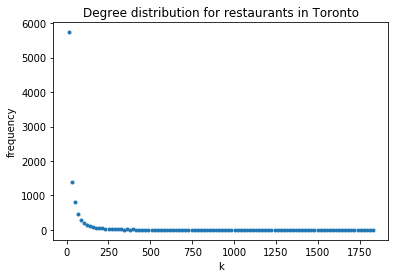

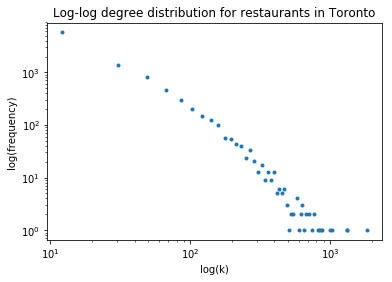

In [20]:
degree_plot(graph, biz_nodes, "restaurants in Toronto")

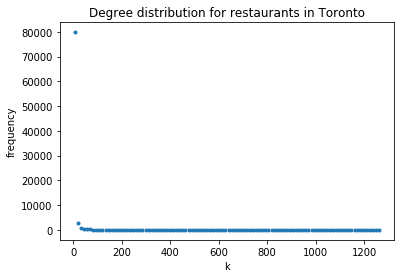

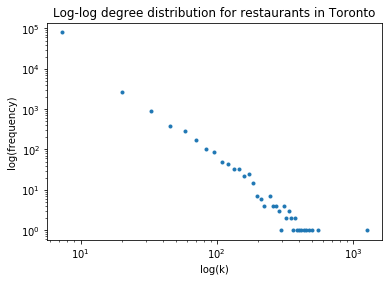

In [21]:
degree_plot(graph, user_nodes, "restaurants in Toronto")

# Average num stars distribution

In [10]:
import collections
eliteUsers = user[user['elite'] != 'None']
nonEliteUsers = user[user['elite'] == 'None']

In [11]:
star_sequence = []
for idx,review in reviews.iterrows():
    star_sequence.append(review.iloc[5])
    if(idx%100000 == 0):
        print(idx)

0
100000
200000
300000


In [14]:
star_sequence_elite = list(reviews[reviews.user_id.isin(eliteUsers.user_id)]['stars'])

In [15]:
star_sequence.sort()
star_sequence_elite.sort()

In [17]:
star_sequence_non_elite = list(reviews[reviews.user_id.isin(nonEliteUsers.user_id)]['stars'])

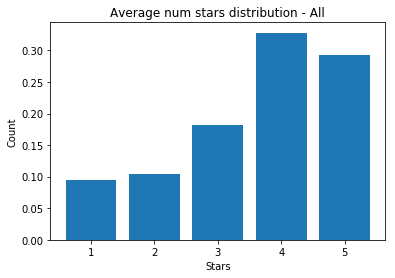

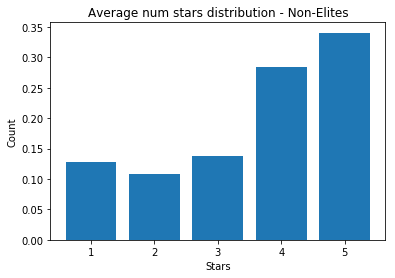

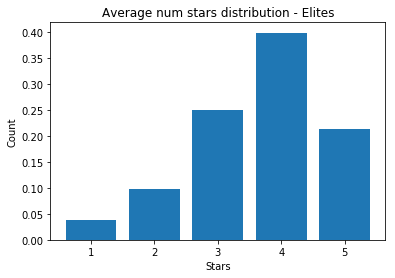

In [18]:
degreeCount = collections.Counter(star_sequence)
deg, cnt = zip(*degreeCount.items())

plt.title("Average num stars distribution - All")
plt.ylabel("Count")
plt.xlabel("Stars")
plt.bar(deg, tuple([x/len(star_sequence) for x in cnt]))

plt.show()

degreeCount = collections.Counter(star_sequence_non_elite)
deg, cnt = zip(*degreeCount.items())

plt.title("Average num stars distribution - Non-Elites")
plt.ylabel("Count")
plt.xlabel("Stars")
plt.bar(deg, tuple([x/len(star_sequence_non_elite) for x in cnt]))
plt.show()

degreeCount = collections.Counter(star_sequence_elite)
deg, cnt = zip(*degreeCount.items())

plt.title("Average num stars distribution - Elites")
plt.ylabel("Count")
plt.xlabel("Stars")
plt.bar(deg, tuple([x/len(star_sequence_elite) for x in cnt]))
plt.show()




### Average num stars when 1-review users are removed.

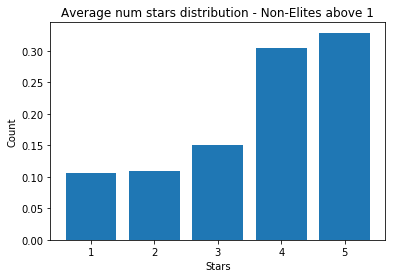

In [19]:
star_sequence_non_elite_above_1 = reviews[reviews.user_id.isin(nonEliteUsers[nonEliteUsers.review_count>3].user_id)].stars

degreeCount = collections.Counter(star_sequence_non_elite_above_1)
deg, cnt = zip(*degreeCount.items())

plt.title("Average num stars distribution - Non-Elites above 1")
plt.ylabel("Count")
plt.xlabel("Stars")
plt.bar(deg, tuple([x/len(star_sequence_non_elite_above_1) for x in cnt]))
plt.show()

In [20]:
len(reviews[reviews.user_id.isin(nonEliteUsers[nonEliteUsers.review_count>20].user_id)].stars)

88505

In [21]:
len(star_sequence_non_elite)

235953

In [22]:
235953-len(reviews[reviews.user_id.isin(nonEliteUsers[nonEliteUsers.review_count>3].user_id)].stars)

37533

# Review Degree distribution

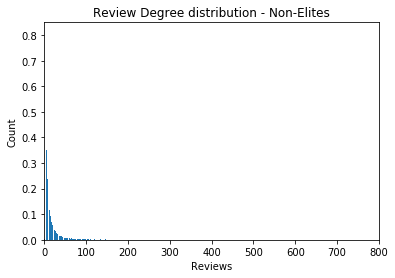

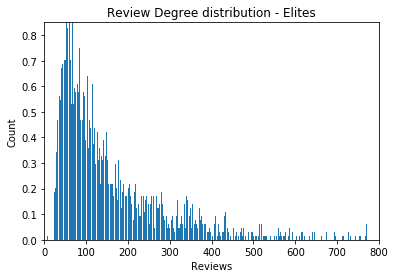

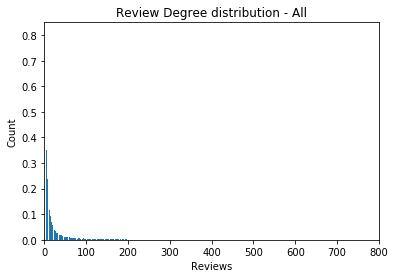

In [181]:
userReviewsCountNonElites = list(nonEliteUsers.review_count)
userReviewsCountNonElites.sort(reverse= True)
userReviewsCountElites = list(eliteUsers.review_count)
userReviewsCountElites.sort(reverse= True)
userReviewsCountAll = list(user.review_count)
userReviewsCountAll.sort(reverse= True)


#TODO Change into a function
degreeCount = collections.Counter(userReviewsCountNonElites)
deg, cnt = zip(*degreeCount.items())



plt.title("Review Degree distribution - Non-Elites")
plt.ylabel("Count")
plt.xlabel("Reviews")
plt.bar(deg,tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-1,800)
plt.ylim(0,0.85)
plt.show()

degreeCount = collections.Counter(userReviewsCountElites)
deg, cnt = zip(*degreeCount.items())

plt.title("Review Degree distribution - Elites")

plt.ylabel("Count")
plt.xlabel("Reviews")
plt.bar(deg, tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-1,800)
plt.ylim(0,0.85)
plt.show()


degreeCount = collections.Counter(userReviewsCountAll)
deg, cnt = zip(*degreeCount.items())

plt.title("Review Degree distribution - All")

plt.ylabel("Count")
plt.xlabel("Reviews")
plt.bar(deg, tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-1,800)
plt.ylim(0,0.85)
plt.show()



# Friend Degree distribution

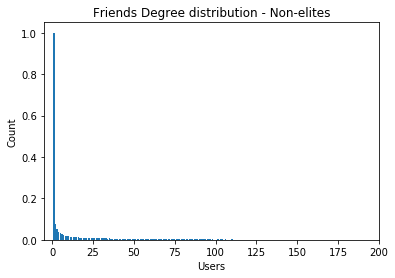

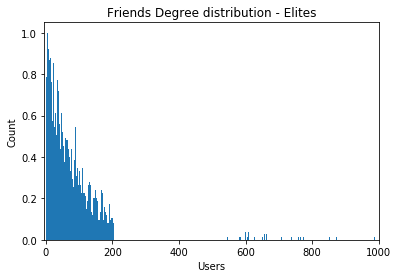

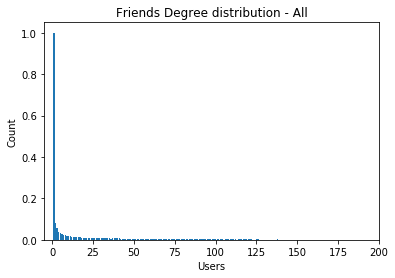

In [184]:
userFriendsCountNonElites = list(nonEliteUsers['friends'].str.count(",")+1)
userFriendsCountNonElites.sort(reverse= True)
userFriendsCountElites = list(eliteUsers['friends'].str.count(",")+1)
userFriendsCountElites.sort(reverse= True)
userFriendsCount = list(user['friends'].str.count(",")+1)
userFriendsCount.sort(reverse= True)


degreeCount = collections.Counter(userFriendsCountNonElites)
deg, cnt = zip(*degreeCount.items())

plt.title("Friends Degree distribution - Non-elites")

plt.ylabel("Count")
plt.xlabel("Users")
plt.bar(deg, tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-5,200)
plt.ylim(0,1.05)
plt.show()


degreeCount = collections.Counter(userFriendsCountElites)
deg, cnt = zip(*degreeCount.items())

plt.title("Friends Degree distribution - Elites")

plt.ylabel("Count")
plt.xlabel("Users")
plt.bar(deg, tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-5,1000)
plt.ylim(0,1.05)
plt.show()


degreeCount = collections.Counter(userFriendsCount)
deg, cnt = zip(*degreeCount.items())

plt.title("Friends Degree distribution - All")

plt.ylabel("Count")
plt.xlabel("Users")
plt.bar(deg, tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-5,200)
plt.ylim(0,1.05)
plt.show()




In [26]:
user[user['friends'].str.count(',') >= 7000]

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
42389,3.96,5032,339,5032,2594,118,279,2269,591,8903,...,71676,"2010, 2009, 2017, 2008, 2013, 2014, 2015, 2016...",2311,"R8UrwrRWXYsiSoUYauriXw, BLkHh9NXpumiF1xEjyTh6g...",12862,Ruggy,2349,72305,iLjMdZi0Tm7DQxX1C1_2dg,2007-07-31
50077,4.08,2557,98,2557,1164,75,161,1366,328,4716,...,3718,"2010, 2009, 2017, 2013, 2016, 2011, 2012, 2014...",1115,"sMg9FedC5D-jf69_c2wjFQ, IdBKLxRJJSz9D-pBzm_M4w...",443,Danny,1917,3902,IU86PZPgTDCFwJEuAg2j7g,2009-01-09
72132,4.02,4518,721,4518,3838,251,317,2719,527,7572,...,28839,"2009, 2014, 2007, 2017, 2010, 2013, 2012, 2016...",1085,"D2-35wyXkp50HTPz5SNMpQ, b4M9lkCHWg3FtS1uTMjxiQ...",29375,Colleen,2771,37489,5MCBLBxr10NLUKZ4AboAMg,2006-09-07
74486,4.12,3571,259,3571,2544,102,222,1976,527,8931,...,13060,"2016, 2011, 2012, 2013, 2018, 2010, 2017, 2014...",1360,"ZBdp9uAQHEtLuy1e5qLlcg, M2zqfnBr2EUI28y8aVRGng...",5993,Abby,2095,18827,djxnI8Ux8ZYQJhiOQkrRhA,2008-05-09
83231,3.79,1677,24,1677,821,91,203,494,489,2098,...,2583,"2017, 2011, 2015, 2012, 2013, 2016, 2014",860,"s1kbaGxgMFUOeOy7_Jq4zg, r7IYwljbEzpSFrh-M951zg...",1170,Randy,2490,2664,ZIOCmdFaMIF56FR-nWr_2A,2011-01-07


In [27]:
user[user['user_id'] == 'iLjMdZi0Tm7DQxX1C1_2dg']['friends'].str.count(',')

42389    12197
Name: friends, dtype: int64

# Connected components

In [166]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import re
import random
import scipy

In [167]:
#in elites edges is added på non-elites
elites = []
Gfriends_Elites = nx.Graph()
Gfriends_NonElites = nx.Graph()
Gfriends_All = nx.Graph()

for row in user.itertuples(index=True):
    u,fs,el = (row.user_id,row.friends,row.elite)
    if el != 'None':
        Gfriends_All.add_node(u, elite = True, withinToronto= True )             
        elites.append(u)     
    else:
        Gfriends_All.add_node(u, elite = False, withinToronto= True )      
        

In [168]:
#add edges

for row in user.itertuples(index=True):
    u,fs,el = (row.user_id,row.friends,row.elite)
    if fs != 'None':
            for f in fs.split(', '):
                Gfriends_All.add_edge(u,f)

### remove random from 1 to 100% of elites


In [69]:
precentage = int(len(elites)*0.01)

random.shuffle(elites)
print("Elites size: " + str(len(elites)))
print("1 % is: " + str(precentage))



lcc = []

for i in range(0,100):
    print(str(i) + " percent removed.")
    print("Network size: " + str(len(Gfriends_All)))
    mcc = len(max(nx.connected_component_subgraphs(Gfriends_All), key=len))
    lcc.append(mcc)
    print("Largest connected component: " + str(mcc))
    for j in range(0,precentage):
        popedElite = elites.pop()
        Gfriends_All.remove_node(popedElite)
    
    
        

Elites size: 7499
1 % is: 74
0 percent removed.
Network size: 1535281
Largest connected component: 1487373
1 percent removed.
Network size: 1535207
Largest connected component: 1483893
2 percent removed.
Network size: 1535133
Largest connected component: 1480057
3 percent removed.
Network size: 1535059
Largest connected component: 1476754
4 percent removed.
Network size: 1534985
Largest connected component: 1471546
5 percent removed.
Network size: 1534911
Largest connected component: 1468533
6 percent removed.
Network size: 1534837
Largest connected component: 1462769
7 percent removed.
Network size: 1534763
Largest connected component: 1459630
8 percent removed.
Network size: 1534689
Largest connected component: 1455411
9 percent removed.
Network size: 1534615
Largest connected component: 1451288
10 percent removed.
Network size: 1534541
Largest connected component: 1447784
11 percent removed.
Network size: 1534467
Largest connected component: 1444467
12 percent removed.
Network size:

In [71]:
#with open('Remove_Elites_LCC.txt', 'w') as f:
#    for item in lcc:
 #       f.write("%s\n" % item)

### remove random from 1 to 100% of non-elites

In [90]:
precentage = int(len(nonEliteUsers)*0.01)


nonEliteUserList = list(nonEliteUsers.user_id)

random.shuffle(nonEliteUserList)
print("Non-Elites size: " + str(len(nonEliteUserList)))
print("1 % is: " + str(precentage))



lccNonElite = []

for i in range(0,100):
    print(str(i) + " percent removed.")
    print("Network size: " + str(len(Gfriends_All)))
    mcc = len(max(nx.connected_component_subgraphs(Gfriends_All), key=len))
    lccNonElite.append(mcc)
    print("Largest connected component: " + str(mcc))
    for j in range(0,precentage):
        popedNonElite = nonEliteUserList.pop()
        Gfriends_All.remove_node(popedNonElite)

        
        


Non-Elites size: 77125
1 % is: 771
0 percent removed.
Network size: 1535281
Largest connected component: 1487373
1 percent removed.
Network size: 1534510
Largest connected component: 1480426
2 percent removed.
Network size: 1533739
Largest connected component: 1473731
3 percent removed.
Network size: 1532968
Largest connected component: 1467398
4 percent removed.
Network size: 1532197
Largest connected component: 1462333
5 percent removed.
Network size: 1531426
Largest connected component: 1454574
6 percent removed.
Network size: 1530655
Largest connected component: 1446313
7 percent removed.
Network size: 1529884
Largest connected component: 1439389
8 percent removed.
Network size: 1529113
Largest connected component: 1431221
9 percent removed.
Network size: 1528342
Largest connected component: 1424712
10 percent removed.
Network size: 1527571
Largest connected component: 1418366
11 percent removed.
Network size: 1526800
Largest connected component: 1412115
12 percent removed.
Network

In [92]:
#with open('Remove_Non_Elites_LCC.txt', 'w') as f:
#    for item in lccNonElite:
#        f.write("%s\n" % item)

### remove random from 1 to 100% of all

In [98]:
precentage = int(len(user)*0.01)


UserList = list(user.user_id)

random.shuffle(UserList)
print("User size: " + str(len(UserList)))
print("1 % is: " + str(precentage))



lccAllUsers = []

for i in range(0,100):
    print(str(i) + " percent removed.")
    print("Network size: " + str(len(Gfriends_All)))
    mcc = len(max(nx.connected_component_subgraphs(Gfriends_All), key=len))
    lccAllUsers.append(mcc)
    print("Largest connected component: " + str(mcc))
    for j in range(0,precentage):
        popedAll = UserList.pop()
        Gfriends_All.remove_node(popedAll)

        
        
#with open('Remove_All_Users_LCC.txt', 'w') as f:
#    for item in lccAllUsers:
#        f.write("%s\n" % item)

User size: 84624
1 % is: 846
0 percent removed.
Network size: 1535281
Largest connected component: 1487373
1 percent removed.
Network size: 1534435
Largest connected component: 1475596
2 percent removed.
Network size: 1533589
Largest connected component: 1465384
3 percent removed.
Network size: 1532743
Largest connected component: 1455609
4 percent removed.
Network size: 1531897
Largest connected component: 1439658
5 percent removed.
Network size: 1531051
Largest connected component: 1425717
6 percent removed.
Network size: 1530205
Largest connected component: 1415438
7 percent removed.
Network size: 1529359
Largest connected component: 1402807
8 percent removed.
Network size: 1528513
Largest connected component: 1394178
9 percent removed.
Network size: 1527667
Largest connected component: 1382108
10 percent removed.
Network size: 1526821
Largest connected component: 1374017
11 percent removed.
Network size: 1525975
Largest connected component: 1364750
12 percent removed.
Network size:

/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


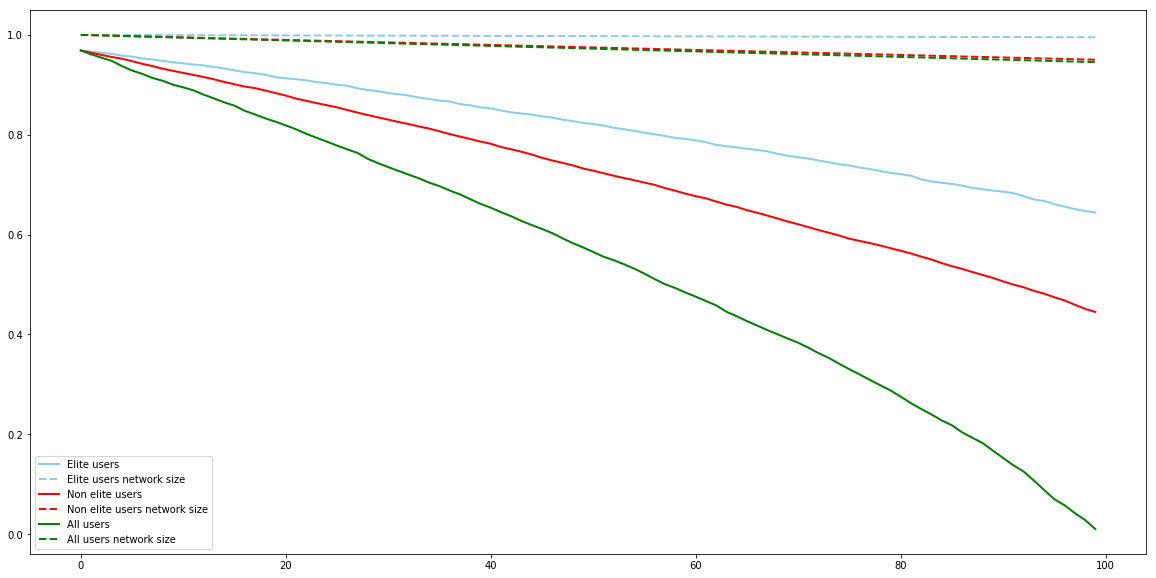

In [154]:
# multiple line plot
x = range(0,100)
y1 = lcc
y2 = lccNonElite
y3 = lccAllUsers

#network sizes
y11 =[]
for d in range(0,100):
    y11.append(len(Gfriends_All)-(int(len(elites)*0.01))*(d))
y21 = []
for d in range(0,100):
    y21.append(len(Gfriends_All)-(int(len(nonEliteUsers)*0.01))*(d))
y31 = []
for d in range(0,100):
    y31.append(len(Gfriends_All)-(int(len(user)*0.01))*(d))



#Normalization
y1 = [number/len(Gfriends_All) for number in y1]
y11 = [number/len(Gfriends_All) for number in y11]
y2 = [number/len(Gfriends_All) for number in y2]
y21 = [number/len(Gfriends_All) for number in y21]
y3 = [number/len(Gfriends_All) for number in y3]
y31 = [number/len(Gfriends_All) for number in y31]

    
    
    
    
    
xmin = 0
xmax = 20
ymin = 1200000
ymax = 1550000


# Data
df=pd.DataFrame({'x': x, 'y1':y1, 'y11':y11,'y2': y2,  'y21': y21, 'y31': y31 , 'y3': y3,  })

plt.figure(figsize=(20,10))
plt.plot( 'x', 'y1', data=df, marker='' , color='skyblue', linewidth=2, label="Elite users")
plt.plot( 'x', 'y11', data=df, marker='', color='skyblue', linewidth=2,linestyle='dashed', label="Elite users network size")
plt.plot( 'x', 'y2', data=df, marker='' , color='red', linewidth=2, label="Non elite users")
plt.plot( 'x', 'y21', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label="Non elite users network size")
plt.plot( 'x', 'y3', data=df, marker='' , color='green', linewidth=2, label="All users")
plt.plot( 'x', 'y31', data=df, marker='', color='green', linewidth=2, linestyle='dashed', label="All users network size")
#plt.axis([xmin,xmax,ymin,ymax])

plt.legend()


In [163]:
precentage = int(len(elites)*0.01)


nonEliteUserList = list(nonEliteUsers.user_id)

random.shuffle(nonEliteUserList)
print("Non-Elites size: " + str(len(nonEliteUserList)))
print("1 % is: " + str(precentage))



lccNonEliteBasedOnEliteSize = []

for i in range(0,100):
    print(str(i) + " percent removed.")
    print("Network size: " + str(len(Gfriends_All)))
    mcc = len(max(nx.connected_component_subgraphs(Gfriends_All), key=len))
    lccNonEliteBasedOnEliteSize.append(mcc)
    print("Largest connected component: " + str(mcc))
    for j in range(0,precentage):
        popedNonElite = nonEliteUserList.pop()
        Gfriends_All.remove_node(popedNonElite)

#with open('Remove_Non_Elites_LCC_based_on_elite_size.txt', 'w') as f:
#    for item in lccNonEliteBasedOnEliteSize:
 #       f.write("%s\n" % item)        

Non-Elites size: 77125
1 % is: 74
0 percent removed.
Network size: 1535281
Largest connected component: 1487373
1 percent removed.
Network size: 1535207
Largest connected component: 1486593
2 percent removed.
Network size: 1535133
Largest connected component: 1485711
3 percent removed.
Network size: 1535059
Largest connected component: 1485196
4 percent removed.
Network size: 1534985
Largest connected component: 1484306
5 percent removed.
Network size: 1534911
Largest connected component: 1483807
6 percent removed.
Network size: 1534837
Largest connected component: 1482875
7 percent removed.
Network size: 1534763
Largest connected component: 1481905
8 percent removed.
Network size: 1534689
Largest connected component: 1481406
9 percent removed.
Network size: 1534615
Largest connected component: 1480865
10 percent removed.
Network size: 1534541
Largest connected component: 1480681
11 percent removed.
Network size: 1534467
Largest connected component: 1479918
12 percent removed.
Network 

In [171]:
precentage = int(len(elites)*0.01)

UserListAll = list(user.user_id)

random.shuffle(UserListAll)
print("Non-Elites size: " + str(len(UserListAll)))
print("1 % is: " + str(precentage))



lccAllUsersBasedOnEliteSize = []

for i in range(0,100):
    print(str(i) + " percent removed.")
    print("Network size: " + str(len(Gfriends_All)))
    mcc = len(max(nx.connected_component_subgraphs(Gfriends_All), key=len))
    lccAllUsersBasedOnEliteSize.append(mcc)
    print("Largest connected component: " + str(mcc))
    for j in range(0,precentage):
        popedNonElite = UserListAll.pop()
        Gfriends_All.remove_node(popedNonElite)

#with open('Remove_All_LCC_based_on_elite_size.txt', 'w') as f:
#    for item in lccNonEliteBasedOnEliteSize:
#        f.write("%s\n" % item)   

Non-Elites size: 84624
1 % is: 74
0 percent removed.
Network size: 1535281
Largest connected component: 1487373
1 percent removed.
Network size: 1535207
Largest connected component: 1486278
2 percent removed.
Network size: 1535133
Largest connected component: 1485618
3 percent removed.
Network size: 1535059
Largest connected component: 1483942
4 percent removed.
Network size: 1534985
Largest connected component: 1483463
5 percent removed.
Network size: 1534911
Largest connected component: 1482912
6 percent removed.
Network size: 1534837
Largest connected component: 1481838
7 percent removed.
Network size: 1534763
Largest connected component: 1480479
8 percent removed.
Network size: 1534689
Largest connected component: 1479679
9 percent removed.
Network size: 1534615
Largest connected component: 1478688
10 percent removed.
Network size: 1534541
Largest connected component: 1478291
11 percent removed.
Network size: 1534467
Largest connected component: 1477108
12 percent removed.
Network 

/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


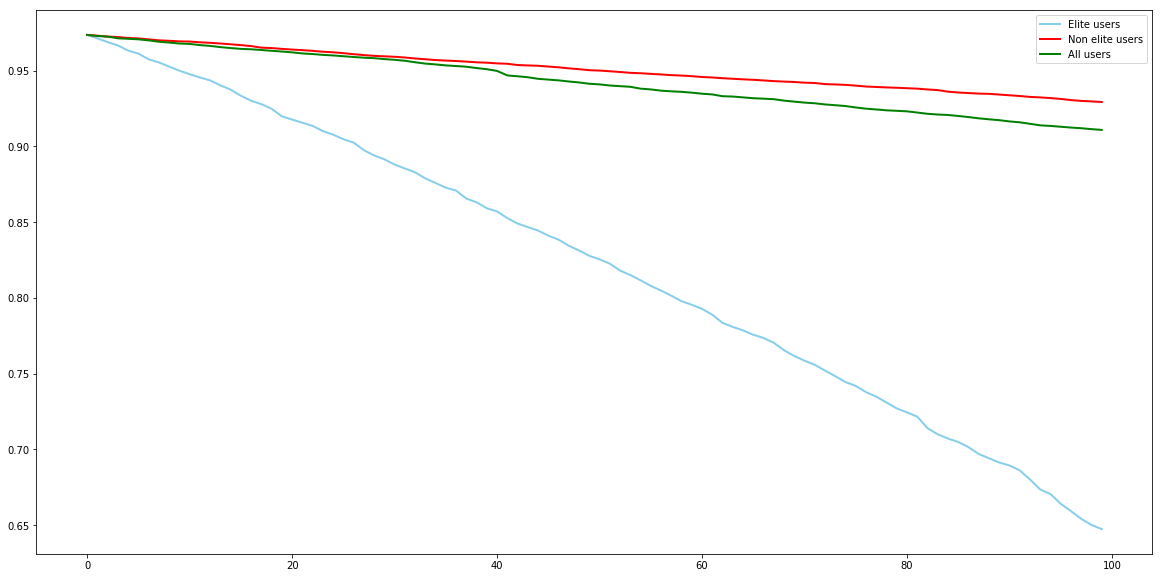

In [172]:
# multiple line plot
x = range(0,100)
y1 = lcc
y2 = lccNonEliteBasedOnEliteSize
y3 = lccAllUsersBasedOnEliteSize



#Normalization
y1 = [number/len(Gfriends_All) for number in y1]
y2 = [number/len(Gfriends_All) for number in y2]
y3 = [number/len(Gfriends_All) for number in y3]


    
    
    
    
    
xmin = 0
xmax = 20
ymin = 1200000
ymax = 1550000


# Data
df=pd.DataFrame({'x': x, 'y1':y1, 'y2': y2, 'y3': y3,  })

plt.figure(figsize=(20,10))
plt.plot( 'x', 'y1', data=df, marker='' , color='skyblue', linewidth=2, label="Elite users")
plt.plot( 'x', 'y2', data=df, marker='' , color='red', linewidth=2, label="Non elite users")
plt.plot( 'x', 'y3', data=df, marker='' , color='green', linewidth=2, label="All users")
#plt.axis([xmin,xmax,ymin,ymax])

plt.legend()